Since our dataset is organized in terms of rice category, we take all 75,000 images of rice and organize into 3 different files (train/test/test) by shuffling.

In [ ]:
# API to split folders 
import pathlib
import splitfolders

In [ ]:
# get directory where dataset are located 
base_ds = r'C:\Users\liewg\OneDrive\Desktop\Rice classifier with CNN\rice'
base_ds = pathlib.Path(base_ds)
base_ds

WindowsPath('C:/Users/liewg/OneDrive/Desktop/Rice classifier with CNN/rice')

In [ ]:
# create 3 folders in the output directory for train/val/test with split ratio
# # splitfolders.ratio(base_ds, output='images', seed=123, ratio=(.7,.15,.15), group_prefix=None)

- Next, we create batches of images from the folders we organize/split.
- We grayscale each images from the folder and split it into 3 files.
- As we can see the output, the distribution of dataset is in the ratio of 0.7/0.15/0.15. Since we have a large dataset (5digits), we recommend this ratio split.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# generate batches
datagen = ImageDataGenerator(rescale=1./255)

# define train/val/test data 
train_data = datagen.flow_from_directory('images/train', color_mode = 'grayscale', target_size = (28,28))
val_data  = datagen.flow_from_directory('images/val', color_mode = 'grayscale', target_size = (28,28))
test_data = datagen.flow_from_directory('images/test', color_mode = 'grayscale', target_size = (28,28))

Found 52500 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.


Each image consists the pixel size by 28x28

In [ ]:
train_data[0][0].shape # Batch size, pixel value, channel

(32, 28, 28, 1)

- This is one single image from our training data.
- Since the rice shows a distinguishable shape, it will possible to detect/compute the differences between different rice type by only using a low pixel value 

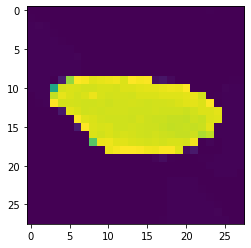

In [ ]:
import matplotlib.pyplot as plt 
sample1 = train_data[0][0][0] # show a sample 
plt.imshow(sample1)

- We randomly pick a few images from our training set

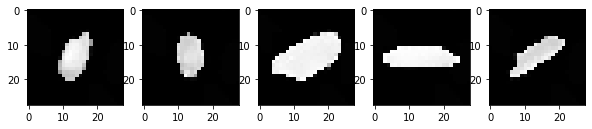

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,5,figsize=(10,10))
for i in range(5):
    ind = np.random.randint(32)
    image = train_data[0][0][ind]
    ax[i].imshow(image,cmap='gray')

Computation steps 
1. I've followed the typical LeNet-5 architecture developed by Yann Le Cunn, but removed 2 fully connected layer at the end. 
2. First, we take input image as a numerical matrix, then element wise each partial segment of the input image with a filter size of 3x3 by  stride of 1. Then we operate this by 32 times since we have 32 filters. 
3. Next we take Convolved image's partial segment, the try to find the maximum value. Then we assign each maximum value to a matrix. 
4. We operate the above steps twice but with differet number. Note that the dimension size is decreasing. This also means computation is getting smaller. 
5. We then take the final output from max pooling. We flatten that matrix into a vector with the shape of (3134,1) .
6. We use (5) and feed in into a fully connected layer with 64 nodes. 
7. Finally we output the probability of each single rice type. The softmax node with the highest probability implies us which category of rice was the input. Since we classify 5 categories, our softmax node is 5.  


In [ ]:
from tensorflow.keras import layers, models
model = models.Sequential ([
            # convolution with 32 filters by size of 3x3 and apply padding to image
            layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28,28,1),padding='same'),
            # Compute max pooling from Convolved image 
            layers.MaxPooling2D((2, 2)),
    
            # repeat twice, but 64 filters
            layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
            layers.MaxPooling2D((2, 2)),
    
            # flatten the matrix into vector  which computed max pooling
            layers.Flatten(),
            # Fully connected layer size node of 64 
            layers.Dense(64, activation='relu'),
            # Build 5 softmax probability for 5 different category
            layers.Dense(5, activation='softmax')
        ])

We take a look at our model architecture

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

Since this is a multi classification task, we use categorical_crossentropy as our loss function.

In [ ]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['acc'])

In [ ]:
result = model.fit(train_data, epochs = 10, validation_data = val_data)

Epoch 1/10
1641/1641 [==============================] - 83s 51ms/step - loss: 0.1627 - acc: 0.9419 - val_loss: 0.0959 - val_acc: 0.9665
Epoch 2/10
1641/1641 [==============================] - 62s 38ms/step - loss: 0.0945 - acc: 0.9661 - val_loss: 0.0892 - val_acc: 0.9679
Epoch 3/10
1641/1641 [==============================] - 63s 38ms/step - loss: 0.0852 - acc: 0.9695 - val_loss: 0.0905 - val_acc: 0.9695
Epoch 4/10
1641/1641 [==============================] - 62s 38ms/step - loss: 0.0796 - acc: 0.9721 - val_loss: 0.0843 - val_acc: 0.9726
Epoch 5/10
1641/1641 [==============================] - 63s 38ms/step - loss: 0.0729 - acc: 0.9744 - val_loss: 0.0788 - val_acc: 0.9741
Epoch 6/10
1641/1641 [==============================] - 63s 38ms/step - loss: 0.0664 - acc: 0.9764 - val_loss: 0.0659 - val_acc: 0.9782
Epoch 7/10
1641/1641 [==============================] - 64s 39ms/step - loss: 0.0601 - acc: 0.9789 - val_loss: 0.0660 - val_acc: 0.9782
Epoch 8/10
1641/1641 [==========================

In the graph, train and test set function is sticking each other closely. We do not see any overfit problem here. 

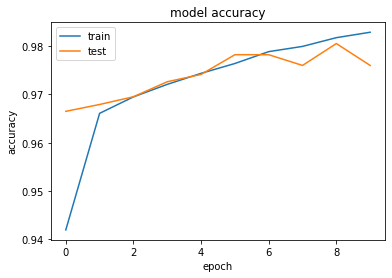

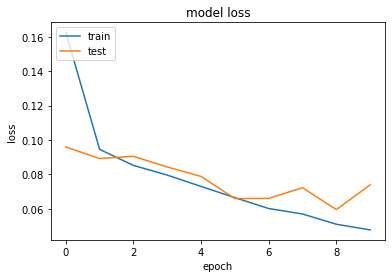

In [ ]:
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc']) 
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

We evaluate our model on our unseen before test set to check our accuracy. 

In [ ]:
_, test_accuracy = model.evaluate(test_data, verbose = False)

In [ ]:
print(f'Test accuracy = {test_accuracy*100:.1f}%')

Test accuracy = 97.4%
